## **REGRESSION** 📈

# Description of the "Motorbike Ambulance Calls" dataset

Motorcycle accidents and related emergency calls are highly dependent on environmental and seasonal conditions such as weather conditions, precipitation, day of the week, season, time of day, etc. The data was collected for two years every hour and then correlated with the relevant weather and seasonality.

Main characteristics of the dataset 'motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Primary Data View

**Task 1** data preparation for processing

1. upload dataset `motorbike_ambulance_calls.csv`;   
2. import packages;
3. derive basic statistical information on numerical variables;
4. print maximum and minimum values ​​for all variables;
5. print the dimension of the dataset;

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def get_data(data_path: str):
    data = pd.read_csv(data_path)
    return data

In [ ]:
data = get_data(data_path="motorbike_ambulance_calls.csv")
data.head()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
#primary statistic information for numeric variables
data_stast = data.describe()
data_stast

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [ ]:
# maximal and minimal values for all variables
d_max = data_stast.loc["max",:]
d_min = data_stast.loc["min",:]
print("Максимальные значения по всем столбцам:",'\n\n', d_max,'\n\n', "Минимальные значения по всем столбцам:",'\n\n', d_min)

Максимальные значения по всем столбцам: 

 index         17379.0000
yr                1.0000
mnth             12.0000
hr               23.0000
holiday           1.0000
weekday           6.0000
workingday        1.0000
weathersit        4.0000
temp              1.0000
atemp             1.0000
hum               1.0000
windspeed         0.8507
cnt             977.0000
Name: max, dtype: float64 

 Минимальные значения по всем столбцам: 

 index         1.00
yr            0.00
mnth          1.00
hr            0.00
holiday       0.00
weekday       0.00
workingday    0.00
weathersit    1.00
temp          0.02
atemp         0.00
hum           0.00
windspeed     0.00
cnt           1.00
Name: min, dtype: float64


In [ ]:
print(data.shape, data.size)

(17379, 15) 260685


**Task 2** check the data types and check the amount of data per variable

In [ ]:
data.dtypes

index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [ ]:
data.count() #amount of data for every variable

index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64

**Task 3** check all variables for omissions.

In [ ]:
data.isna().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Conclusions**

1. The size of the dataset is 17379 by 15, that is, 17379 rows and 15 columns (attributes), one of which is the index (essentially our row counter, from 1 to 17279), and the other is the target function (cnt), the values ​​of which are in the interval from 1 to 977. In fact, we currently have 14 relevant attributes (we do not take the index attribute as relevant, since it does not give us any new information) and they correspond to their descriptions above.
2. The data types correspond to the names and descriptions of the attributes; in fact, we have 9 integer attributes, 4 fractional float types and also two attributes of the object type (string). If this type is appropriate for the season attribute, then not so much for the date. Judging by the amount of data for each variable, there are no gaps in the dataset.
3. After checking the data for gaps, we receive confirmation of checking the amount of data for each variable - there are no values ​​of the Nan type in the dataset (no missing values).

**Task 4** change the date variable to a date type. Determine the clock boundaries for the dataset.

In [ ]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df

data = tranform_date(data, 'date')
data.head()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
data.dtypes #additional check for type change

index                  int64
date          datetime64[ns]
season                object
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object

In [ ]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = min(df[date_col_name])
    last_day = max(df[date_col_name])
    print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")

In [ ]:
get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


**Conclusions**

As mentioned earlier, a date variable represented by a string is not the most convenient option for working with it, so it is better to change the data type to another one for dates, in our case this is done by the to_datetime function. We also see that the type has indeed changed from object to datetime64. Using the min and max functions, we are already able to successfully work with date data in the new format, and we display the hour frames of the dataset. In the case of the earliest date, we get the correct record (both by time and by the date itself). The second date, the latest, is correct, but I am confused by the time 00:00:00, because in fact the time there should be 23 hours, not zero (however, in the date attribute that we pass to the function, there is no time data, for this we have an hr attribute, so this answer is correct). As we see, the hourly frame of our dataset is actually 2 years, from January 1, 2011 to December 31, 2012

#Analysis of categorical variables

**Task 5** separate categorical variables into a separate dataset







In [ ]:
#Categorical variables: mnth, yr, weekday, workingday, weathersit, season, hr, holiday
data_categorical = data[['mnth', 'yr', 'weekday', 'workingday', 'weathersit', 'season', 'hr', 'holiday']]
data_categorical.head()

,mnth,yr,weekday,workingday,weathersit,season,hr,holiday
0,1,0,6,0,1,spring,0,0
1,1,0,6,0,1,spring,1,0
2,1,0,6,0,1,spring,2,0
3,1,0,6,0,1,spring,3,0
4,1,0,6,0,1,spring,4,0


**Task 6** convert the variable season to a numeric scale.

In [ ]:
#With to_replace
#def encode_season(df: pd.DataFrame, season_col_name: str):
#    df = df.replace(to_replace =["spring", "summer", "autumn", "winter"], value =["1", "2", "3", "4"])
#    return df

#data = encode_season(data, 'season')
#data.head()

#With map
def encode_season(df: pd.DataFrame, season_col_name: str):
    df[season_col_name] = df[season_col_name].map({'spring':1, 'summer':2,'autumn':3, 'winter':4,})
    return df

data = encode_season(data, 'season')
data.head()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
#Check valies of attribute season
data.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [ ]:
data.dtypes

index                  int64
date          datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object

In [ ]:
data_categorical = encode_season(data_categorical, 'season')
data_categorical.head()

,mnth,yr,weekday,workingday,weathersit,season,hr,holiday
0,1,0,6,0,1,1,0,0
1,1,0,6,0,1,1,1,0
2,1,0,6,0,1,1,2,0
3,1,0,6,0,1,1,3,0
4,1,0,6,0,1,1,4,0


In [ ]:
data_categorical.season.unique()

array(['1', '2', '3', '4'], dtype=object)

**Task 7** build 'countplot' graphs for all categorical variables

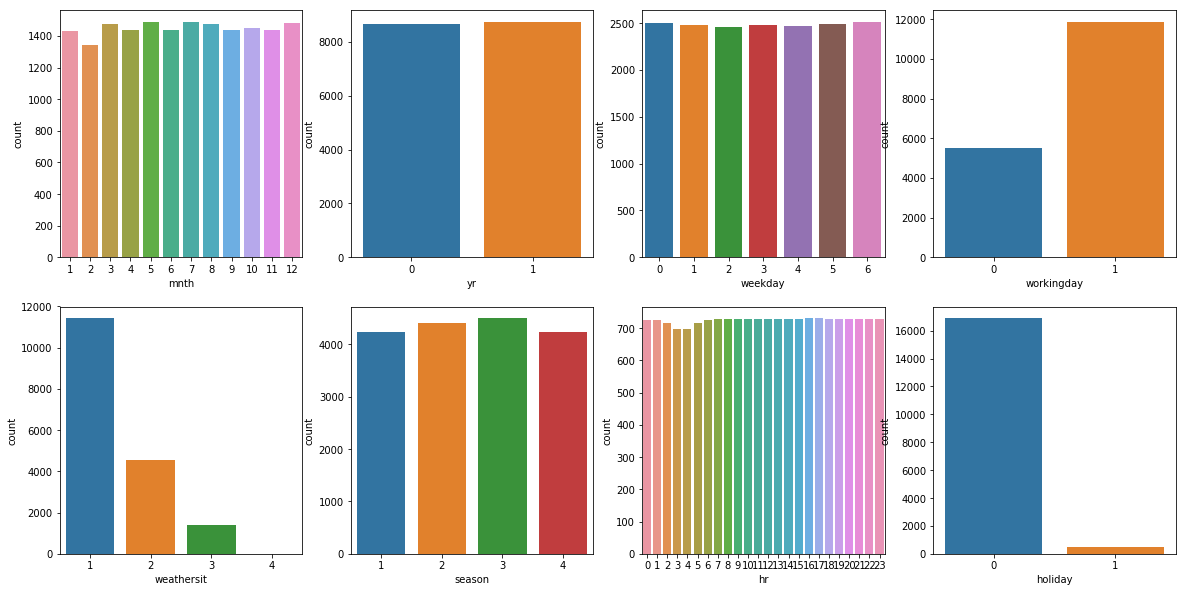

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  #Variant 1
    sns.countplot(x=variable, data=data_categorical, ax = subplot)

    #Variant 2
    #sns.countplot(ax = ax[0,0], x="mnth", data=data_categorical)
    #sns.countplot(ax = ax[0,1], x="yr", data=data_categorical)
    #sns.countplot(ax = ax[0,2], x="weekday", data=data_categorical)
    #sns.countplot(ax = ax[0,3], x="workingday", data=data_categorical)
    #sns.countplot(ax = ax[1,0], x="weathersit", data=data_categorical)
    #sns.countplot(ax = ax[1,1], x="season", data=data_categorical)
    #sns.countplot(ax = ax[1,2], x="holiday", data=data_categorical)
    #sns.countplot(ax = ax[1,3], x="hr", data=data_categorical)

**Conclusions**

1. Categorical variables are variables with a limited number of unique values ​​or categories. I considered the attributes mnth, yr, weekday, workingday, weathersit, season, hr and holiday to be such, so they were included in the data_categorical dataset. In the graphs above we see these variables clearly, and it becomes clear that they were chosen correctly.
2. As a fairly important categorical variable, we'll want to see season in the graphs and consider its relationship to other attributes, so we code it. I decided to take values ​​from 1 to 4, based on the description of this attribute at the very beginning. Personally, I think the easiest way to do this is to_replace, however, this approach may not work with every dataset (do not rule out that there may be such cases), because to_replace, in fact, goes through the entire dataset and replaces all the values ​​​​prescribed that it encounters. Therefore, there is another option to encode strings into numeric values; for this, map is used, which encodes values ​​for a specific column. From now on I will slowly abandon to_replace in favor of map, since map still seems more reliable to me. Also, using the unique function, we were able to display all possible values ​​of the season column and now we can say for sure that the values ​​changed correctly. This procedure was carried out on both the general data dataset and data_categorical
3. According to the countplot graphs, we see interesting results. First of all, I am attracted to the countplot holiday, since it clearly shows that many more calls were received NOT during the holidays, hence we conclude that the fact of the holiday has little effect on the occurrence of an accident. Next, weathersit - I am surprised that most of the calls were received on fairly good weather days (which corresponds to number 1 in the dataset), but the very minimum of calls is observed, oddly enough, in the worst weather (probably due to the fact that people apparently don't ride motorcycles in bad weather much). Then workingday - here, predictably, more calls were received on weekdays - this is explained by the rush and lack of concentration. The remaining data does not show such a big difference. Let's consider the season - everything is more or less smooth here, in summer and autumn there are slightly more calls than in winter and spring (in winter and spring there may be more slush and ice on the streets, so perhaps everyone is trying to be more careful, but in summer and autumn Often there may be good weather, which gives a greater feeling of safety, hence less attention on the road, which leads to a slight increase in the number of calls). In hr everything is quite smooth, a little more calls come in from 2 to 5 am (obviously someone is returning from night parties). In mnth everything is smooth, except that in February, surprisingly, the number of calls decreases (apparently, people are really afraid of ice on the roads and therefore take less risks). There is nothing to say about weekday, everything is smooth there, although it would seem that on weekends the chances of an increase in the number of calls should increase significantly, but in the end the difference is very small. And we are left with yr, and we see that the years themselves did not affect the number of calls.



#Analysis of numerical variables

**Task 8** separate numerical variables into a separate dataset

In [ ]:
#Numerical variables: temp, windspeed, hum, atemp, cnt (remembering, that cnt is a target variable)
data_numerical = data[['temp', 'windspeed', 'hum', 'atemp', 'cnt']]
data_numerical.head()

,temp,windspeed,hum,atemp,cnt
0,0.24,0.0,0.81,0.2879,16
1,0.22,0.0,0.80,0.2727,40
2,0.22,0.0,0.80,0.2727,32
3,0.24,0.0,0.75,0.2879,13
4,0.24,0.0,0.75,0.2879,1


**Task 9** construct distribution histograms for all numerical variables

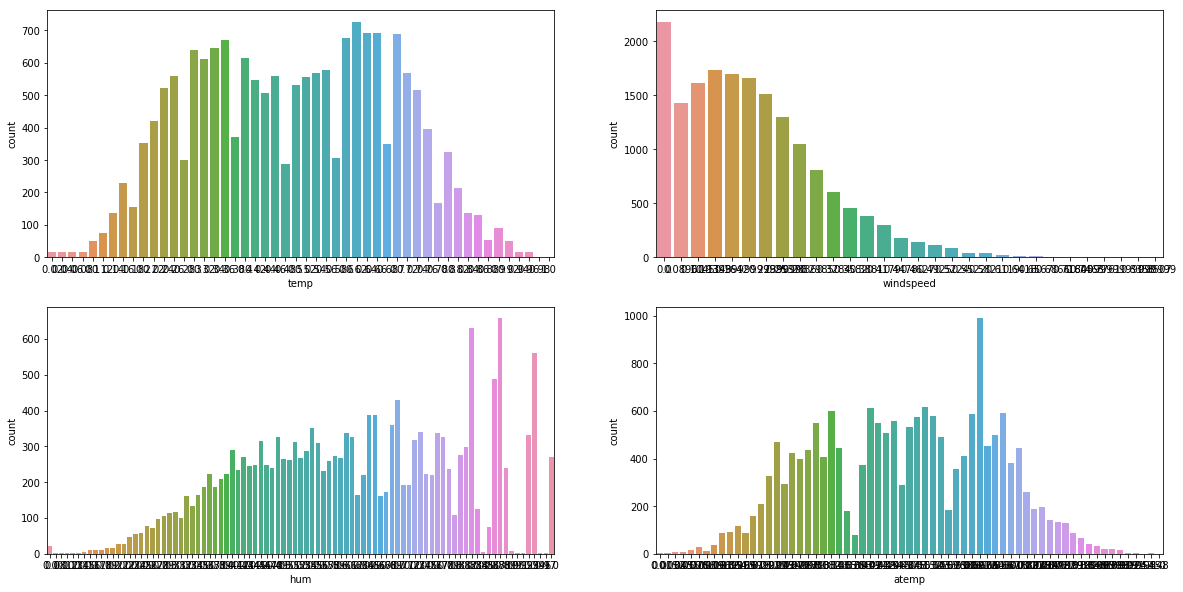

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical.drop('cnt', axis = 1), ax.flatten()):
    sns.countplot(x=variable, data=data_numerical, ax = subplot)

(array([  78.,  786., 2342., 2631., 3047., 3216., 3942., 1044.,  279.,
          14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

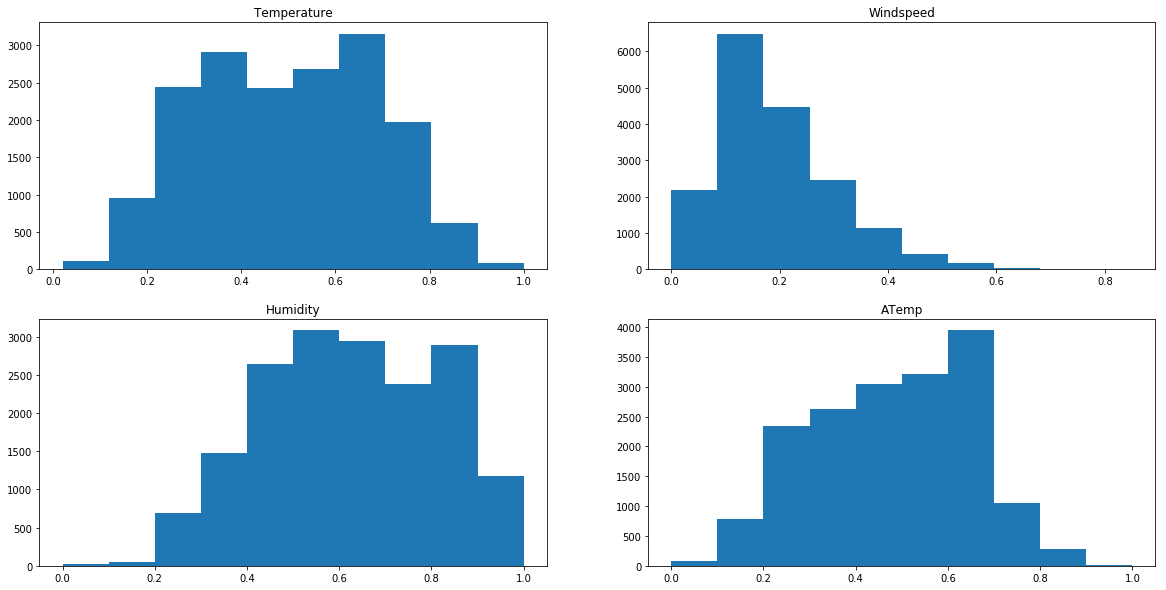

In [ ]:
grids = plt.figure(figsize=(20, 10))
x_temp = grids.add_subplot(221)
x_temp.set_title('Temperature')
x_temp.hist(data_numerical['temp'])

x_wind = grids.add_subplot(222)
x_wind.set_title('Windspeed')
x_wind.hist(data_numerical['windspeed'])

x_hum = grids.add_subplot(223)
x_hum.set_title('Humidity')
x_hum.hist(data_numerical['hum'])

x_atemp = grids.add_subplot(224)
x_atemp.set_title('ATemp')
x_atemp.hist(data_numerical['atemp'])

**Task 10** construct a histogram of the distribution of the target variable and calculate the slope coefficient

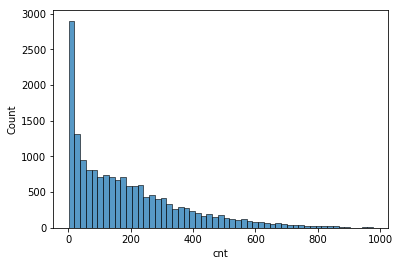

In [ ]:
sns.histplot(data=data, x='cnt')

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

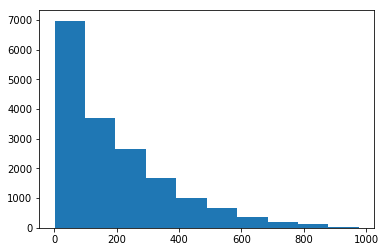

In [ ]:
#Or...
plt.hist(data=data, x="cnt")

In [ ]:
#The Slope coefficient
print("Kоэффициент наклона: ", data['cnt'].skew())

Kоэффициент наклона:  1.2774116037490577


**Conclusions**



1. The attributes temp, windspeed, hum, atemp, cnt act as numeric variables, because they all have a numeric type (in this case, float or int), and are also not categorical, so they are included in the data_numerical dataset. The index attribute was not taken into account since it is simply a counter and does not provide new information.
2. Due to the strange overlapping of the x-axis numbers on each other on the seaborn graphs, I decided to build, just in case, for clarity, also ordinary histograms, because even if they are not as pleasant as seaborn, they display the x-axis numbers correctly. To display graph data, we exclude the cnt attribute from the data_numerical dataset in this command, since it is the target one and we will look at it more closely later. From these histograms we see that with average temperatures and low winds, more calls were received, and an increase in humidity values ​​also leads to an increase in the number of calls.
3. The slope coefficient obtained by the skew function based on the Fisher-Pearson coefficient for our target attribute cnt was equal to 1.27, that is, much greater than zero, indicating a heavy right tail - the graph confirms this. For normally distributed data, the slope coefficient skew should be zero or at least close to zero. Obviously, our data is not at all normally distributed; this is most likely not a linear model, and in this case, linear regression is unlikely to work well on these data. But let's look at the result at the end.



# Analysis of relationships between numerical and categorical variables

**Task 11** plot the scatterplot between all numerical variables and the target variable 'cnt'

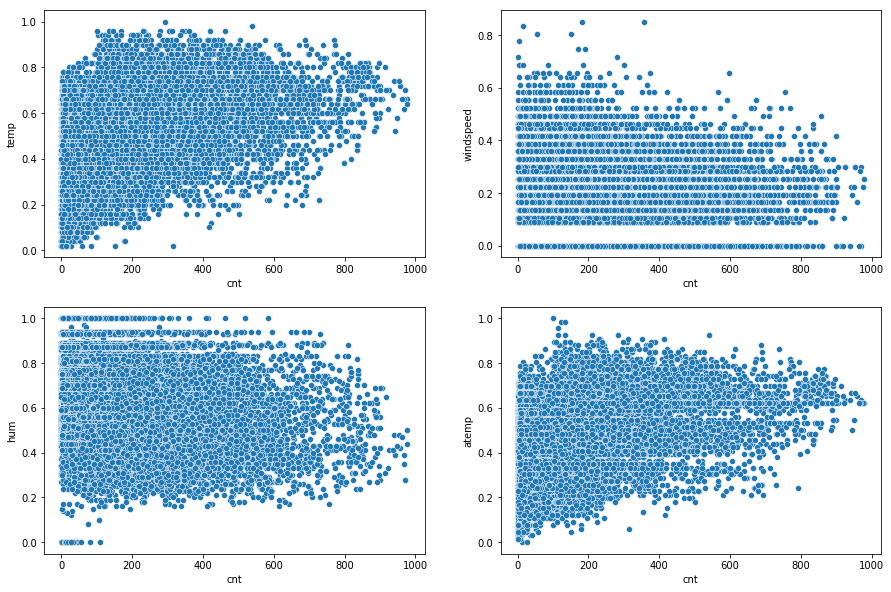

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
    sns.scatterplot(x='cnt', y = var, data = data_numerical, ax = subplot)

**Task 12** construct a boxplot of the relationship between the categorical variables and the target variable cnt.

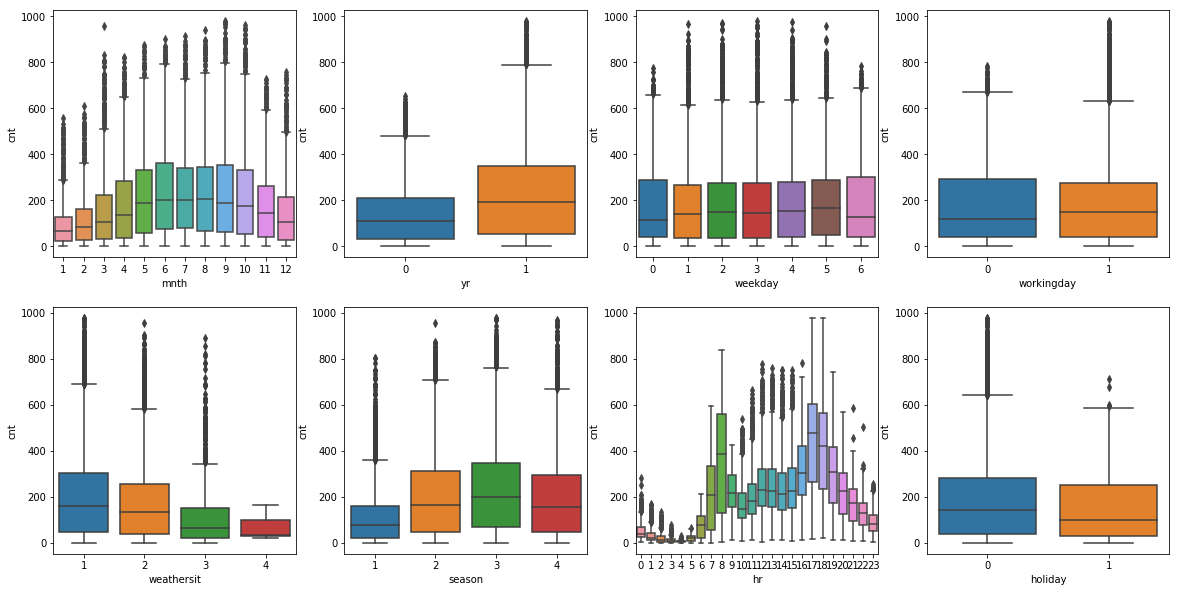

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
    sns.boxplot(x=var,y= 'cnt', data = data, ax = subplot)

**Conclusions**

1. Looking at the scatterplots, we see that the largest number of calls occurred when temperatures were average or slightly higher, when there was little or no wind, which was less common, and when humidity was average or slightly lower. We also see that occasionally the temperature was felt lower than it actually was, and approximately at these moments, along with the time when the feeling of temperature and its objective value approximately coincided, the largest number of calls came. It is very interesting that on the scatterplot for wind speed we observe an absolutely empty line where there should have been observations of very low wind speed (on the graph the value is 0.1 on the ordinate axis) - this may mean that data on calls in the absence of wind can be included in new variable. The situation is somewhat similar with the humidity scatterplot, where a very small piece of data about calls at zero humidity is completely separated from the rest of the observations. Perhaps this is an outlier, which is what I tend to do in the case of humidity, or maybe it is a new trend that is truly worthy of being introduced into a new attribute (which is what I tend to do in the case of wind speed).
2. In the boxplot we see some small number of outliers. In this type of graph, we see significant differences from what we observed in their countplot versions. For example, in mnth, more obvious differences in the number of calls are visible: we see a more clear picture - from May to October inclusive, there is a larger number of calls, reaching its peak in September and October. At the same time, in March there is a larger number of calls than in April, and even with a small outlier - it seems to me that this can be explained by the fact that after winter people try to go out on the road on a motorcycle, but due to weather conditions this results in increased calls and dropouts; Realizing that it is still early, people postpone this activity, and the number of calls in April decreases until May-June. What is interesting is the sharp increase in calls in December after a sharp decline in November. Further in yr, oddly enough, there are many more calls, as it seems to me, with outliers in 2012 compared to 2011. In weekday you can notice the same strange trend as in countplot - there are fewer calls on weekends than on weekdays, which will be confirmed by workingday. Weathersit has a familiar situation - there are many more calls in good weather than in bad weather (though there are outliers in intermediate categories 2 and 3). In the season, everything is also clear - autumn is ahead by calls, and spring is at the very end. On holiday you can see that there is a much greater chance of receiving a call on a regular day than on a holiday. And on hr we see a decline in calls from one to six in the morning (the “quiest” time is from 3 to 5), after a smooth increase there is a sharp drop in calls at 8 in the morning, the same sharp decline until 12 and again very sharp a drop at 17-19 hours, then a decline with emissions. From this we conclude that the number of calls at 8 am, when people are going to work in a hurry and usually sleep-deprived, and at 17-19, when they, on the contrary, are driving from work and are rushing home, depends on time.
3. Even if there are outliers in this dataset, I think they do not interfere too much, but on the contrary - some of them can show hidden trends, like in a scatterplot with wind speed. And moreover, in our case, they even better describe the pictures that come to mind when considering and analyzing graphs.



**Task 13** Build a correlation matrix:

1. Calculate the correlation coefficients for the data set using the Pearson method
2. Display the obtained matrix of coefficients in the form of a heat map  
3. Calculate the correlation coefficients for the data set using the Spearman method
4. Display the obtained matrix of coefficients in the form of a heat map

5. Describe the obtained results based on the value of the correlation coefficients and explain the difference between the chosen methods.

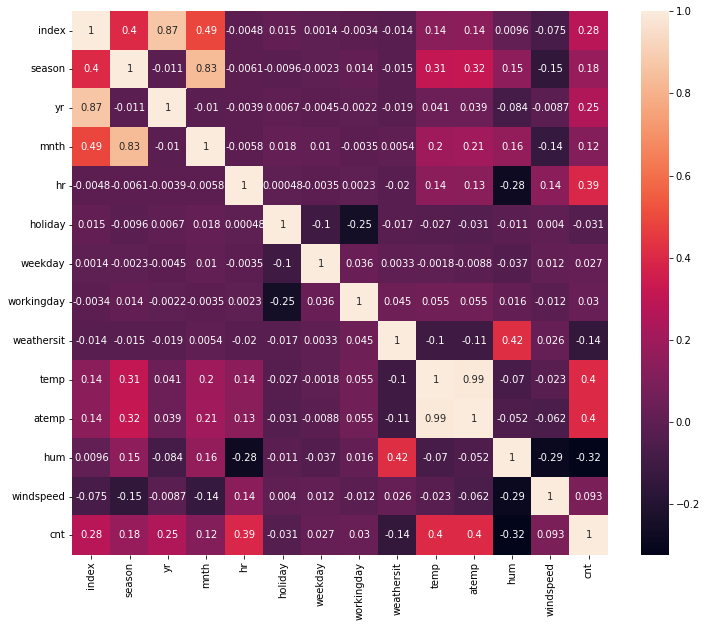

In [ ]:
correlation_coef = data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(12,10))
heatmap_plot = sns.heatmap(correlation_coef, annot=True)
heatmap_plot

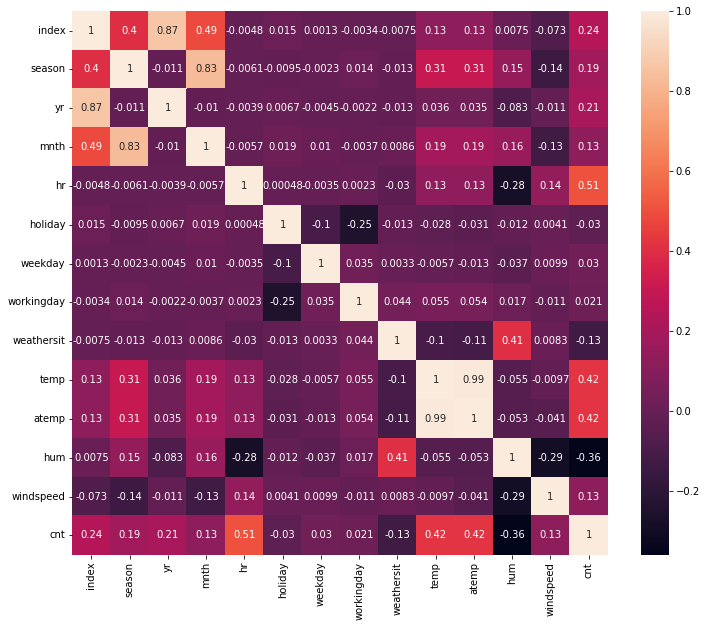

In [ ]:
correlation_coef = data.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(12,10))
heatmap_plot = sns.heatmap(correlation_coef, annot=True)
heatmap_plot

**Personal addition:** According to the built heatmaps, it is obvious that there is a very high correlation between the variables temp and atemp (which is not surprising), so one of them should be removed. I choose to remove atemp, as it seems to me that the objective value of temperature is a more important attribute than its sensation. Also, there is a large correlation between the attributes index and yr, so I remove index (not that it is really necessary. As a result, we get the following Pearson and Spearman heatmaps:

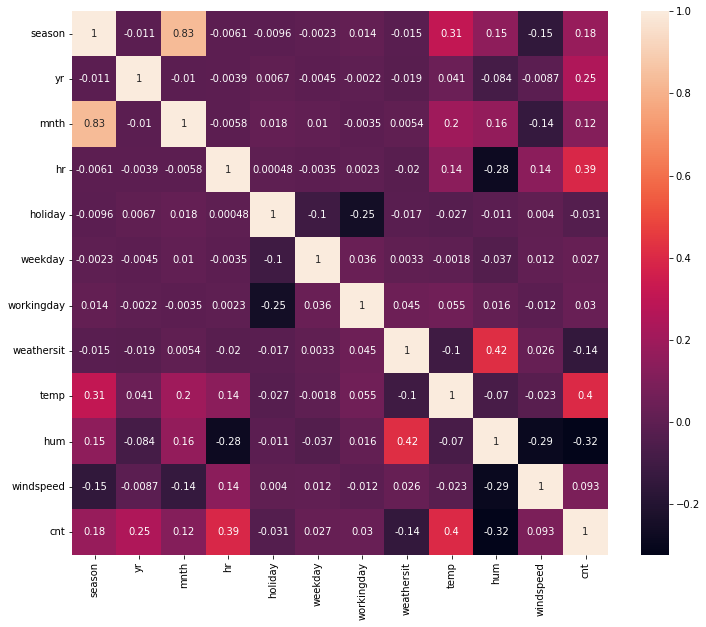

In [ ]:
data = data.drop(['index', 'atemp'], axis = 1)
correlation_coef = data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(12,10))
heatmap_plot = sns.heatmap(correlation_coef, annot=True)
heatmap_plot

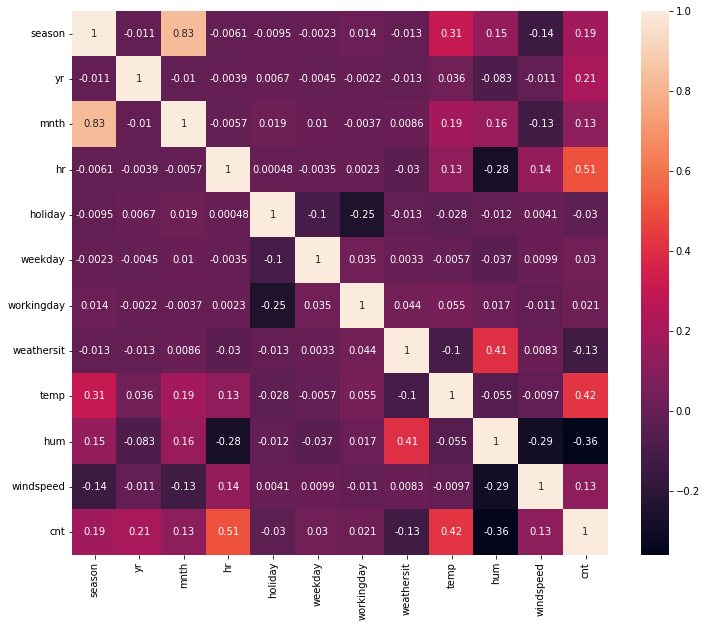

In [ ]:
correlation_coef = data.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(12,10))
heatmap_plot = sns.heatmap(correlation_coef, annot=True)
heatmap_plot

**Conclusions**

As it was written above in the personal supplement, the variables atemp and index were excluded from the dataset due to the high correlation of atemp and temp and the high unnecessary correlation of index and yr. On the heatmaps, we see a logical correlation between the attributes of weather conditions, namely weathersit and hum (0.42), temp and cnt (0.4), as well as hr and cnt (0.39), that is, the hours and temperature greatly affect the number of calls. However, we have the largest correlation, 0.83, between yr and mnth, which is predicted. There is also a good correlation between season and temp (0.31). The coefficients according to the Spearman method give a slightly higher correlation for the given dependences, which suggests that the correlation is monotonic, but not linear.

**Task 14**
1. build a linear regression model:
2. remove variables that are NOT relevant;

3. divide the sample into train, test and validation in the proportion of 70/30;

4. conduct training of the linear regression model;

1. To further work with the models for each categorical variable, we will create dummy variables to avoid misordering the categories. get_dummies

In [ ]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
                      pd.get_dummies(df['season']),
                      pd.get_dummies(df['hr']),
                      pd.get_dummies(df['holiday']),
                      pd.get_dummies(df['mnth']),
                      pd.get_dummies(df['yr']),
                      pd.get_dummies(df['weekday']),
                      pd.get_dummies(df['workingday']),
                      pd.get_dummies(df['weathersit']),
                         ], axis = 1
                     )
    features = features.drop(['season',
                              'mnth',
                              'weekday',
                              'weathersit'
                              ], axis = 1)
    return features

In [ ]:
features = get_dummies(data)
features.head()

,date,yr,hr,holiday,workingday,temp,hum,windspeed,cnt,1,...,3,4,5,6,0,1,1,2,3,4
0,2011-01-01,0,0,0,0,0.24,0.81,0.0,16,1,...,0,0,0,1,1,0,1,0,0,0
1,2011-01-01,0,1,0,0,0.22,0.80,0.0,40,1,...,0,0,0,1,1,0,1,0,0,0
2,2011-01-01,0,2,0,0,0.22,0.80,0.0,32,1,...,0,0,0,1,1,0,1,0,0,0
3,2011-01-01,0,3,0,0,0.24,0.75,0.0,13,1,...,0,0,0,1,1,0,1,0,0,0
4,2011-01-01,0,4,0,0,0.24,0.75,0.0,1,1,...,0,0,0,1,1,0,1,0,0,0


In [ ]:
features.drop(['index', 'date', 'workingday', 'windspeed', 'atemp', 'summer', 'winter'], axis=1)
features.head()

,date,yr,hr,holiday,workingday,temp,hum,windspeed,cnt,1,...,3,4,5,6,0,1,1,2,3,4
0,2011-01-01,0,0,0,0,0.24,0.81,0.0,16,1,...,0,0,0,1,1,0,1,0,0,0
1,2011-01-01,0,1,0,0,0.22,0.80,0.0,40,1,...,0,0,0,1,1,0,1,0,0,0
2,2011-01-01,0,2,0,0,0.22,0.80,0.0,32,1,...,0,0,0,1,1,0,1,0,0,0
3,2011-01-01,0,3,0,0,0.24,0.75,0.0,13,1,...,0,0,0,1,1,0,1,0,0,0
4,2011-01-01,0,4,0,0,0.24,0.75,0.0,1,1,...,0,0,0,1,1,0,1,0,0,0


2. Based on the time variable, create a new variable that will be responsible for day and night.

In [ ]:
features['night_hours'] = features.hr.apply(lambda i : 0 if (i < 5 or i >= 23) else 1)

In [ ]:
features.head()

,date,yr,hr,holiday,workingday,temp,hum,windspeed,cnt,1,...,4,5,6,0,1,1,2,3,4,night_hours
0,2011-01-01,0,0,0,0,0.24,0.81,0.0,16,1,...,0,0,1,1,0,1,0,0,0,0
1,2011-01-01,0,1,0,0,0.22,0.80,0.0,40,1,...,0,0,1,1,0,1,0,0,0,0
2,2011-01-01,0,2,0,0,0.22,0.80,0.0,32,1,...,0,0,1,1,0,1,0,0,0,0
3,2011-01-01,0,3,0,0,0.24,0.75,0.0,13,1,...,0,0,1,1,0,1,0,0,0,0
4,2011-01-01,0,4,0,0,0.24,0.75,0.0,1,1,...,0,0,1,1,0,1,0,0,0,0


In [ ]:
features = features.drop('hr', axis = 1)
features.head()

,date,yr,holiday,workingday,temp,hum,windspeed,cnt,1,2,...,4,5,6,0,1,1,2,3,4,night_hours
0,2011-01-01,0,0,0,0.24,0.81,0.0,16,1,0,...,0,0,1,1,0,1,0,0,0,0
1,2011-01-01,0,0,0,0.22,0.80,0.0,40,1,0,...,0,0,1,1,0,1,0,0,0,0
2,2011-01-01,0,0,0,0.22,0.80,0.0,32,1,0,...,0,0,1,1,0,1,0,0,0,0
3,2011-01-01,0,0,0,0.24,0.75,0.0,13,1,0,...,0,0,1,1,0,1,0,0,0,0
4,2011-01-01,0,0,0,0.24,0.75,0.0,1,1,0,...,0,0,1,1,0,1,0,0,0,0


**Linear Regression Model**  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Once the dummy variables are obtained, one from each category should be removed to prevent multicollinearity. We also remove two more attributes date and atemp

In [ ]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

In [ ]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
    X = df.drop(target, axis = 1)
    y = df[target]
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [ ]:
def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_model(X_train, y_train)

In [ ]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10470.041, test: 10112.308
R^2 train: 0.687, test: 0.680


Because there are many independent variables in our model, we cannot display their dependence in two-dimensional space, but we can plot the relationship between the model residuals and the predicted values, which will also help us evaluate the quality of the model.

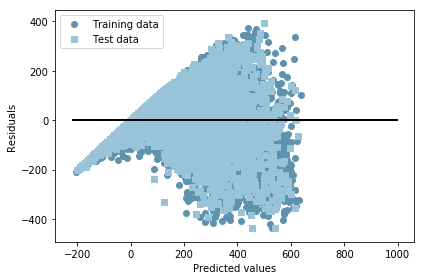

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Conclussions**

1. We built a linear model and removed irrelevant variables, namely atemp (since it differs little from temp, as we clearly saw on the heat map) and date, since we also will not need this attribute much further. Next, to avoid incorrect order of categories, we introduced dummy variables and also removed one of them in each category to avoid multicolinearity
2. Next, we divide our sample into training, learning and validation in a standard 70/30 split to train a linear regression model. After the prediction is executed, we get a rather low accuracy, namely 0.68 on the test and training samples.
3. Next, we plot the relationship between the model residuals and the predicted values ​​of the training and education samples to assess the quality of the model. As a result, we see a graph that is a wave that does not even approximately pass along a visual line. This gives us final evidence that our model is nonlinear, which means linear regression is not applicable to our data.

